Vamos a ver como crear agrupamientos utilizando nuestro ultimo archivo de los inmuebles,esto es necesario antes de comenzar a realizar estadisticas descriptivas como verificar la mediana,los cuartiles,algunos valores minimos o maximos,la desviacion estandrad,etc, entonces primero debo poder agrupar los registros de alguna columna,etc.

In [23]:
import pandas as pd

In [24]:
dt=pd.read_csv(r"C:\Users\User\Desktop\dataScience\pandasDatos\alquilerResidencial.csv",sep=";")
dt.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,21.43,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,16.67,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,50.00,Departamento


In [25]:
#la practica sera poder calcular la mediana de la columna Distrito,para esto primero debemos saber agrupar, el profesor nos dejael enlace de la documentacion de pandas: https://pandas.pydata.org/docs/reference/index.html.

#ahora, ya sabemos que podemos sacar la media utilizando el metodo mean(),por ejemplo la media de la columna Valor es:
dt['Valor'].mean()

5159.318636548821

In [26]:
#ahora,queremos saber el valor de la media de algunos distritos de nuestro df, primero hacemos una lista con algunos distritos, estos distritos seran a los que les calcularemos la media
barrios=['Ate','Barranco','Comas','Lince','El Agustino','San Luis','Callao']

In [27]:
#despues creamos el criterio de seleccion utilizando esta lista,osea capturamos en una variable los registros de la columna Distrito que contengan los elementos de la lista barrios,osea la condicion es que esos registros coincidan con los elementos de la lista, este criterio seleccion lo usamos para capturara ese pedazo de nuestro df que cumpla con la condicion
# seleccion=dt['Distrito'].isin(barrios)
# dt=dt[seleccion]
# dt.head(10)

In [28]:
#hasta aqui simplemente hemos definido nuestro df con una condicion especial para trabajar con el,ahora para  agrupar los registros que queremos por la columna Distrito usamos el metodo groupby() y le pasamos la columna de la cual queremos agrupar, el metodo groupby() nos devuelve un objeto de tipo DataFrameGroupBy que es otro tipo de df en pandas
grupoBarrio=dt.groupby('Distrito')

In [29]:
#ahora, esto sirve para poder ver en un diccionario cada barrio que se encuentra en la columna Distrito y ademas ver en que posicion va apareciendo cada elemento utilizando los metodos con que cuenta pandas,por ejemplo podemos utilizar el metodo groups para ver esto asi:
grupoBarrio.groups


{'Ancón': [44, 1258, 1311, 1340, 1709, 1728, 2160, 2710, 2779, 3912, 3953, 4007, 4133, 4411, 4463, 4491, 4503, 4731, 4739, 5677, 5930, 5951, 6165, 6356, 6432, 6655, 7355, 7464, 7744, 7757, 7776, 7838, 7940, 8235, 8910, 9314, 9442, 9689, 9814, 10298, 10455, 10594, 10625, 10664, 10678, 10943, 11352, 11571, 11623, 11663, 11713, 11745, 12012, 12254, 12362, 12523, 12614, 13652, 13981, 14221, 14787, 14921, 15166, 15541, 15554, 15944, 16257, 16357, 16381, 17276, 17306, 17525, 17991, 18034, 18095, 18228, 18297, 18402, 18611, 18666, 18681, 18826, 18995, 19041, 19397, 19583, 20352, 20733, 20930, 21003, 21012, 21343, 21728], 'Ate': [3, 5, 14, 16, 21, 30, 32, 35, 42, 43, 61, 62, 63, 65, 69, 75, 80, 82, 94, 108, 111, 113, 118, 131, 133, 137, 152, 155, 157, 167, 168, 175, 188, 191, 210, 217, 224, 227, 236, 239, 242, 247, 262, 268, 277, 279, 294, 295, 296, 298, 305, 311, 314, 329, 339, 340, 349, 364, 370, 372, 378, 384, 391, 393, 404, 416, 436, 437, 439, 440, 443, 453, 456, 467, 468, 470, 478, 481, 4

In [30]:
#puedo iterar grupoBarrio con dos variables de barrio que mostrara el barrio, y otra que sea data que sacara un df por cada barrio iterado,con este df data de cada barrio ya puedo calcular la mediana de cada uno de los distritos y mostrarla asi:
for barrio,data in grupoBarrio:
    print(f'{barrio} -> {data.Valor.mean().round(2)}')

Ancón -> 3816.34
Ate -> 6960.98
Barranco -> 1403.83
Bellavista -> 972.56
Breña -> 4099.12
Callao -> 4915.28
Carabayllo -> 1461.86
Carmen de La Legua -> 2523.67
Chaclacayo -> 1428.07
Chorrillos -> 8604.04
Cieneguilla -> 1044.64
Comas -> 8823.8
El Agustino -> 1152.67
Independencia -> 909.26
Jesús María -> 4001.75
La Molina -> 1425.23
La Perla -> 5918.41
La Punta -> 2425.18
La Victoria -> 1141.74
Lima -> 1310.0
Lince -> 1736.1
Los Olivos -> 1611.73
Lurigancho -> 8852.13
Lurín -> 2327.79
Magdalena del Mar -> 1886.54
Mi Perú -> 1748.47
Miraflores -> 5578.48
Pachacámac -> 1485.57
Pucusana -> 5166.26
Pueblo Libre -> 8245.68
Puente Piedra -> 1457.82
Punta Hermosa -> 5643.13
Punta Negra -> 1702.89
Rímac -> 8615.88
San Bartolo -> 3919.79
San Borja -> 4083.2
San Isidro -> 996.28
San Juan de Lurigancho -> 5262.65
San Juan de Miraflores -> 1132.5
San Luis -> 1980.73
San Martín de Porres -> 1183.25
San Miguel -> 2108.41
Santa Anita -> 1461.84
Santa María del Mar -> 1191.18
Santa Rosa -> 1043.8
Santi

In [31]:
#ahora, podria haber echo lo mismo simplemente utlizando el metodo mean() en grupoBarrio['Valor'] directamente
grupoBarrio['Valor'].mean().round(2)

Distrito
Ancón                      3816.34
Ate                        6960.98
Barranco                   1403.83
Bellavista                  972.56
Breña                      4099.12
Callao                     4915.28
Carabayllo                 1461.86
Carmen de La Legua         2523.67
Chaclacayo                 1428.07
Chorrillos                 8604.04
Cieneguilla                1044.64
Comas                      8823.80
El Agustino                1152.67
Independencia               909.26
Jesús María                4001.75
La Molina                  1425.23
La Perla                   5918.41
La Punta                   2425.18
La Victoria                1141.74
Lima                       1310.00
Lince                      1736.10
Los Olivos                 1611.73
Lurigancho                 8852.13
Lurín                      2327.79
Magdalena del Mar          1886.54
Mi Perú                    1748.47
Miraflores                 5578.48
Pachacámac                 1485.57
Pucusana   

In [32]:
#si lo necesito puedo pasar mas de una columna y sacar asi su mediana,al pasar mas de una columna ya me saca un df
grupoBarrio[['Valor','Mantenimiento']].mean().round(2)

,Valor,Mantenimiento
Distrito,,
Ancón,3816.34,916.32
Ate,6960.98,3508.33
Barranco,1403.83,324.89
Bellavista,972.56,170.33
Breña,4099.12,999.84
Callao,4915.28,674.36
Carabayllo,1461.86,357.42
Carmen de La Legua,2523.67,276.17
Chaclacayo,1428.07,362.59


Estadistica Descriptiva

Ya sabemos agrupar, ahora podemos aplicar estadistica descriptiva a este grupo que creamos.
La estadística descriptiva es la técnica matemática que obtiene, organiza, presenta y describe un conjunto de datos con el propósito de facilitar el uso, generalmente con el apoyo de tablas, medidas numéricas o gráficas.

In [33]:
#utilizando el metodo describe() sobre una columna de nuestro objeto podemos obtener datos descriptivos de nuestro objeto
grupoBarrio['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ancón,93.0,3816.34,5363.42,400.0,900.0,1700.0,4900.0,38000.0
Ate,3960.0,6960.98,11806.44,560.0,2500.0,4300.0,8500.0,600000.0
Barranco,47.0,1403.83,1496.62,450.0,800.0,1100.0,1200.0,8000.0
Bellavista,43.0,972.56,495.64,400.0,700.0,850.0,1100.0,3600.0
Breña,176.0,4099.12,3468.09,790.0,2400.0,3000.0,4000.0,22000.0
Callao,483.0,4915.28,44046.80,500.0,1200.0,1700.0,2250.0,800000.0
Carabayllo,43.0,1461.86,1033.67,480.0,900.0,1200.0,1800.0,6000.0
Carmen de La Legua,30.0,2523.67,5820.90,485.0,525.0,1000.0,1675.0,30000.0
Chaclacayo,135.0,1428.07,715.11,400.0,1000.0,1200.0,1650.0,4500.0


In [34]:
#basados en estos datos podemos analizar varias cosas,por ejemplo vemos que esta bd es de inmuebles para alquilar y vender,si lo que queremos es tener los resultados de los inmuebles para alquilar podemos ver que hay algo que no cuadra en el max, porque para alquilar un inmueble su valor maximo deberia ser de 10mil,o de 30mil,pero vemos que hay valores de 800mil y 100mil,etc, podemos inferir que lo que pasa es que se esta sacando el max de ambos inmuebles,osea se estan sumando los de alquiler y los de venta y por eso se elevan esos valores max.Para esto sirven estas estadisticas descriptivas,para identificar errores.

#ahora, para corregir esto y obtener los valores que deseo ver,puedo capturar solo las columnas con las que me interesa trabajar que son min y max utilizando el metodo aggregate() y le paso las columnas,esto me sacara un df,tambien puedo renombrar las columnas para que se vea mejor. Ahora como solo estabamos utilizando una muestra de todo el df y ya tenia errores,vamos a comentar la linea donde creamos esata para la muestra y asi volvemos a ejecutar todo de nuevo pero ya con el df completo porque deben de aparecer la totalidad de datos y logico con mas errores,por ejmplo en el dato de Chorrillos el valor maximo ya pasa de 4 millones.
grupoBarrio['Valor'].aggregate(['min','max']).rename(columns={'min':'Mínimo','max':'Máximo'})

,Mínimo,Máximo
Distrito,,
Ancón,400.0,38000.0
Ate,560.0,600000.0
Barranco,450.0,8000.0
Bellavista,400.0,3600.0
Breña,790.0,22000.0
Callao,500.0,800000.0
Carabayllo,480.0,6000.0
Carmen de La Legua,485.0,30000.0
Chaclacayo,400.0,4500.0


In [35]:
#ahora, estos son muchos datos para analizar, por esta razon es mejor tener graficos para poder ver mejor los datos, para esto podemos utilizar la biblioteca Matplotlib que complementa muy bien con pandas y nos sirve para generar graficos.Para poder usarla primero la habilitamos online y despues si la importamos para poder usarla dentro del notebook si trabajamos con collab de google,pero aqui en vsc debemos instalarla con pip install matplotlib. Despues creamos un recurso con rc(), este recurso sera una figura que nos sacara el grafico que queremos ver,le podemos dar un tamaño.

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,10))

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 1.0, 'Valor Medio del Alquiler por Distrito')

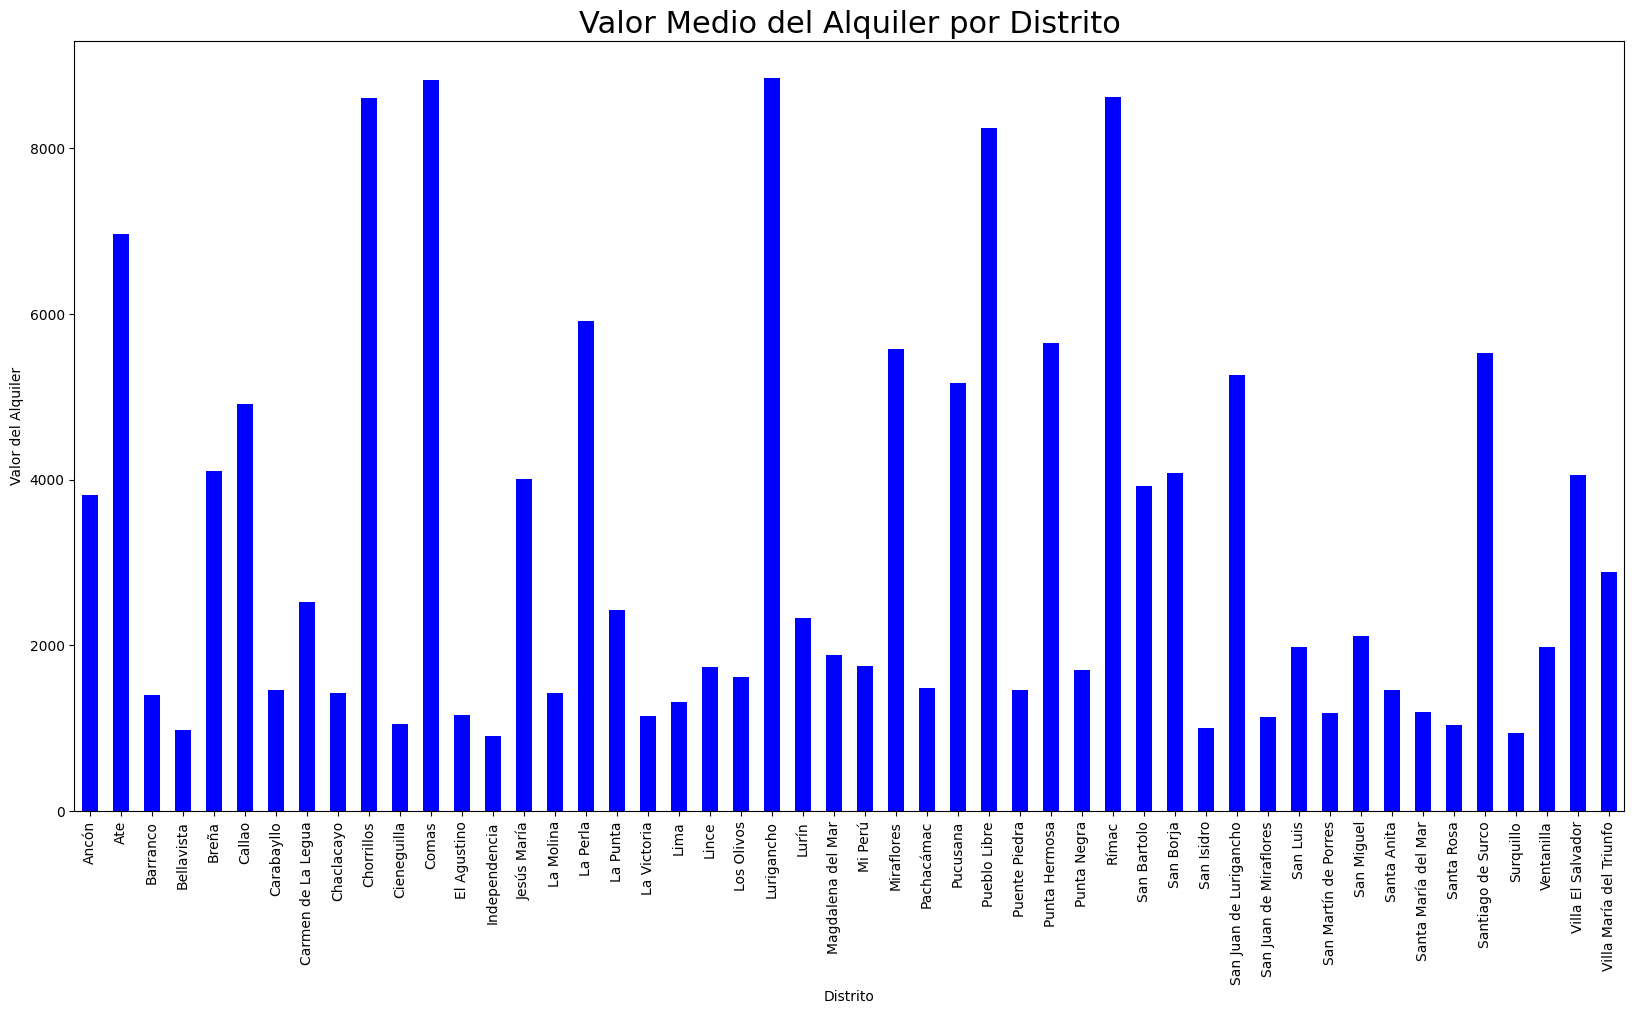

In [36]:
#ya teniendo esta figura,le debemos pasar los datos que queremos ver,osea los datos de la columna Valor,y como queremos saber la media usamos el metodo mean(), para que se pueda crear el grafico debemos usar el metodo plot y le indicamos que tipo de grafico queremos,usaremos un grafico de barras con color azul, tambien puedo configurarle las etiquetas y un titulo, tambien establecer un tamaño de fuente.
fig=grupoBarrio['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Medio del Alquiler por Distrito',{'fontsize':22})

Text(0.5, 1.0, 'Valor Maximo del Alquiler por Distrito')

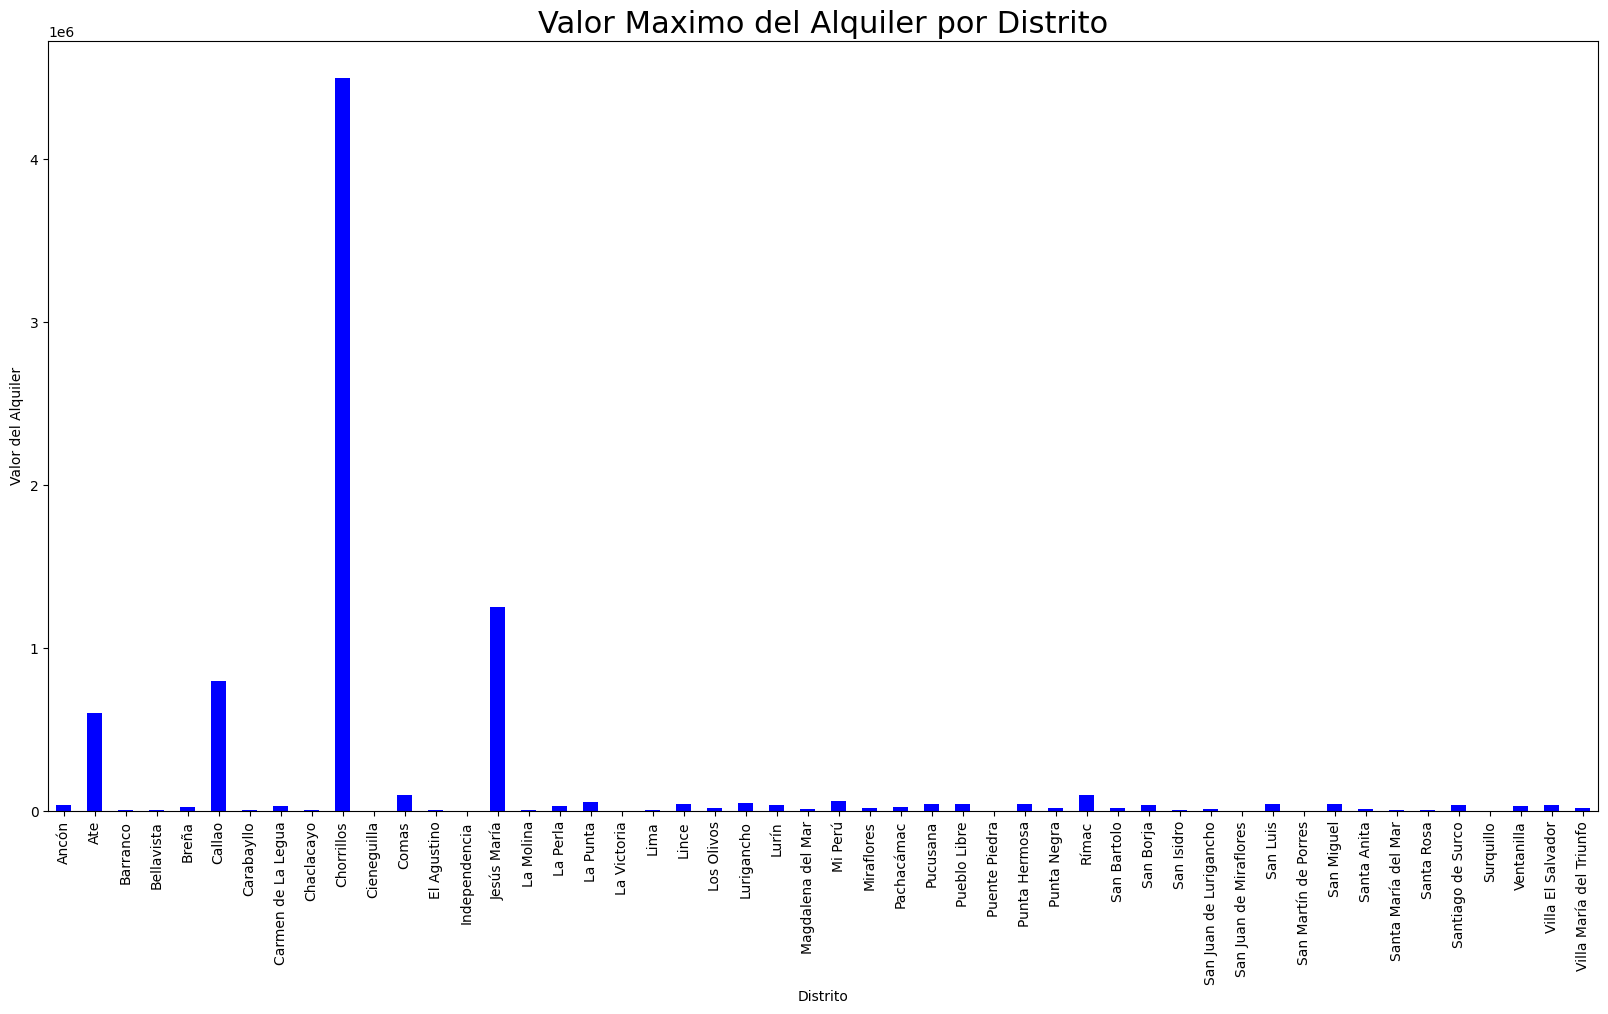

In [37]:
#podemos ver mucho mejor la media de los distritos en este grafico, los valores son los mismos del df que sacamos con el metodo describe() que nos arroja los datos de la media,min,max,etc solo que aqui los podemos analizar mejor por ser un grafico mas descriptivo.Puedo entonces generar graficos para otros datos que quiera,por ejemplo para el valor maximo.
fig=grupoBarrio['Valor'].max().plot.bar(color='blue')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Maximo del Alquiler por Distrito',{'fontsize':22})